In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Effect of Age on Charges')

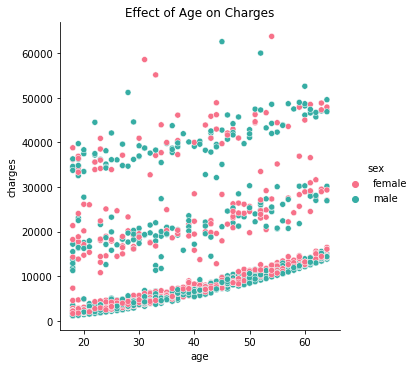

In [11]:
sns.relplot(x = "age",y ="charges",hue="sex",data=df,palette="husl")
plt.title("Effect of Age on Charges")

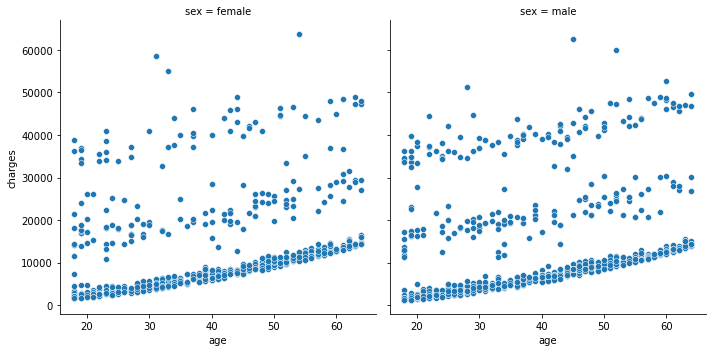

In [12]:
sns.relplot(x='age', y='charges', col='sex',data=df, palette='husl')

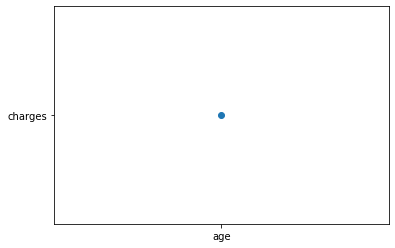

In [13]:
xpoints = np.array(["age"])
ypoints = np.array(["charges"])
plt.plot(xpoints,ypoints,"o")
plt.show()

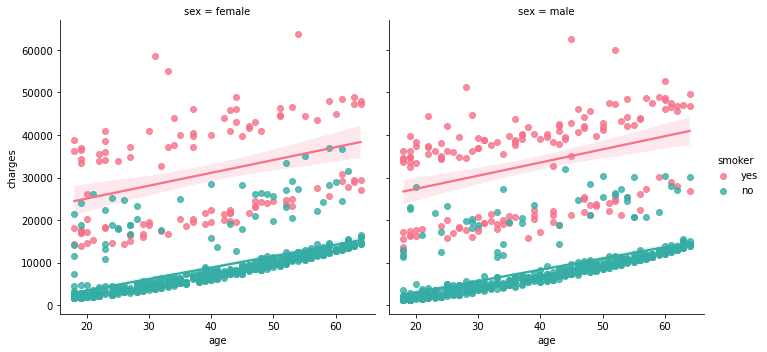

In [14]:
sns.lmplot(x='age', y='charges', hue='smoker', col='sex',data=df, palette='husl')


Text(0.5, 1.0, 'Effect of Smoking on Charges of males and females')

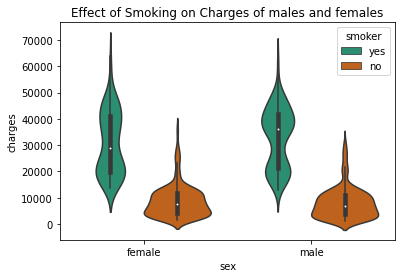

In [15]:
sns.violinplot(x="sex", y='charges', hue="smoker", data=df,palette='Dark2')
plt.title('Effect of Smoking on Charges of males and females')


In [16]:
data_grouped=df.groupby(['smoker', 'sex']).agg({'charges':'sum','sex':'count'})
data_grouped['mean_charges']= data_grouped['charges']/data_grouped['sex']
data_grouped=data_grouped.rename(columns={'sex':'number_in_gender'})
data_grouped.index=[0,1,2,3]
data_grouped['smoker']=['no','no','yes','yes']
data_grouped['sex']=['female','male','female','male']
data_grouped=data_grouped[['smoker', 'sex','number_in_gender','charges','mean_charges']]
data_grouped

,smoker,sex,number_in_gender,charges,mean_charges
0,no,female,547,4.792977e+06,8762.297300
1,no,male,517,4.181085e+06,8087.204731
2,yes,female,115,3.528085e+06,30678.996276
3,yes,male,159,5.253679e+06,33042.005975


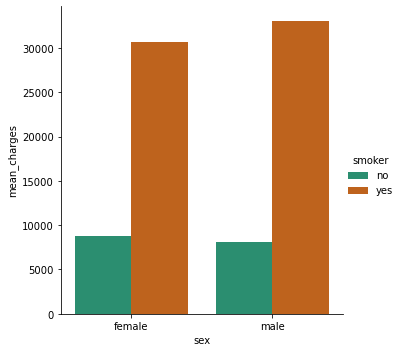

In [17]:
sns.catplot(x='sex',y='mean_charges',hue='smoker',kind='bar',data=data_grouped, palette='Dark2')

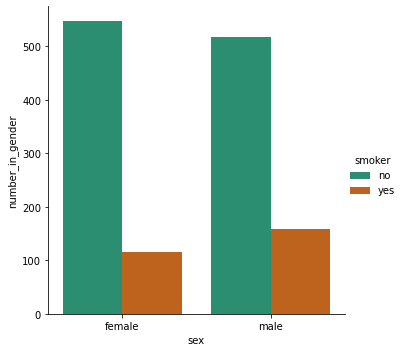

In [18]:
sns.catplot(x='sex',y='number_in_gender',hue='smoker',kind='bar',data=data_grouped, palette='Dark2')


Text(0.5, 1.0, 'Effect of BMI on Charges')

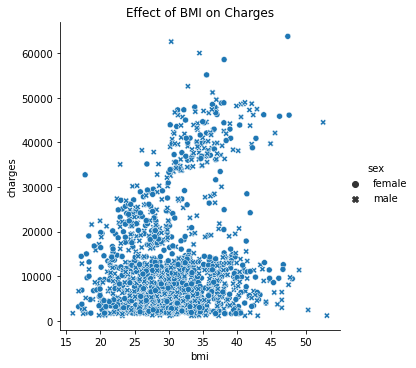

In [19]:
sns.relplot(x='bmi',y='charges',style='sex',data=df)
plt.title("Effect of BMI on Charges")

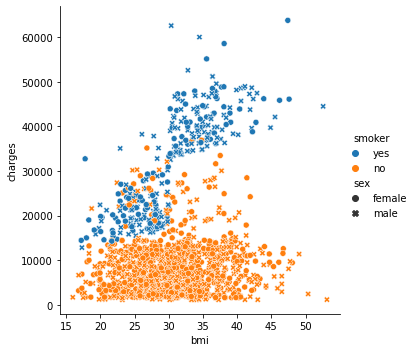

In [20]:
sns.relplot(x='bmi',y='charges',hue='smoker',style='sex',data=df)


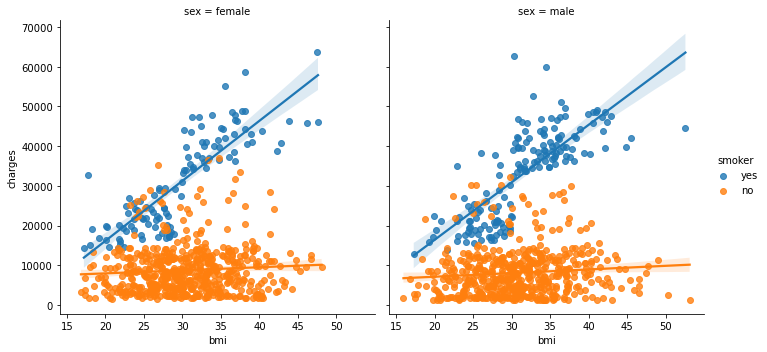

In [21]:
sns.lmplot(x='bmi',y='charges',hue='smoker', col='sex',data=df)


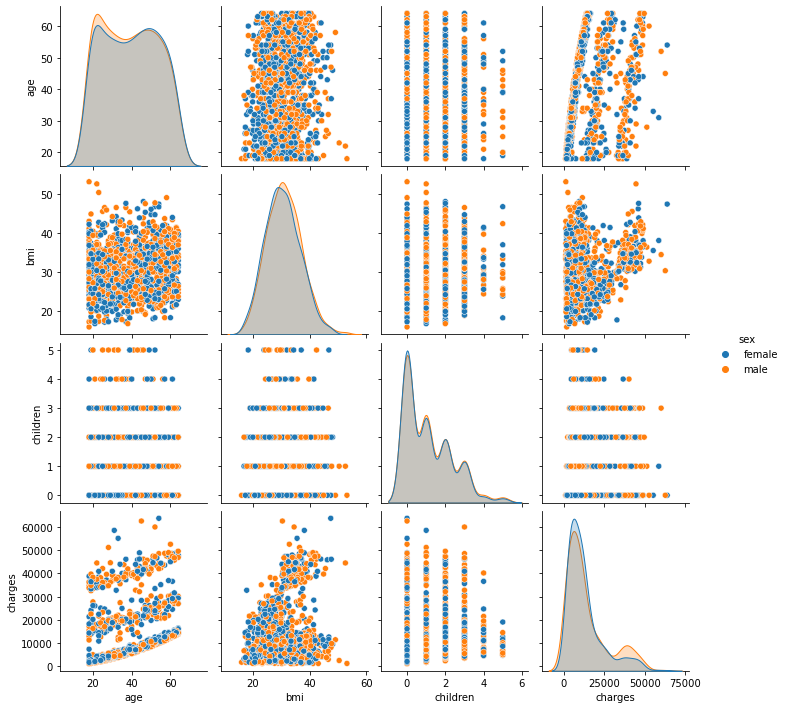

In [22]:
sns.pairplot(df, vars= ['age','bmi','children','charges'], hue='sex')

Text(0.5, 1.0, 'Charges vs number of children')

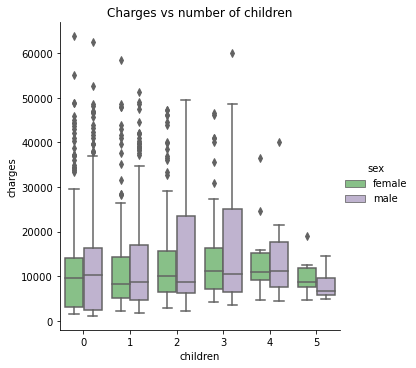

In [23]:
sns.catplot(x="children", y='charges', hue='sex', kind='box',data=df, palette= 'Accent')
plt.title('Charges vs number of children')


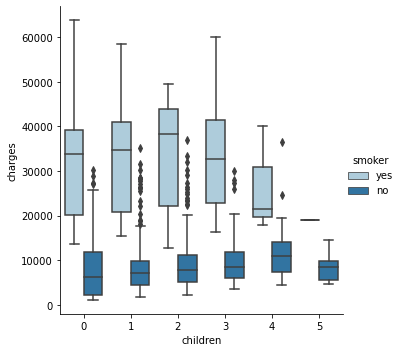

In [24]:
sns.catplot(x="children", y='charges', hue='smoker', kind='box',data=df , palette= 'Paired')


In [25]:
data_grouped2=df.groupby('children').agg({'charges':'sum','sex':'count'})
#data_grouped['mean_charges']= data_grouped['charges']/data_grouped['sex']
data_grouped2['mean_charges2']=data_grouped2['charges']/data_grouped2['sex']
data_grouped2['median_charges']=df.groupby('children')['charges'].median()
data_grouped2

,charges,sex,mean_charges2,median_charges
children,,,,
0,7.098070e+06,574,12365.975602,9856.95190
1,4.124900e+06,324,12731.171832,8483.87015
2,3.617655e+06,240,15073.563734,9264.97915
3,2.410785e+06,157,15355.318367,10600.54830
4,3.462664e+05,25,13850.656311,11033.66170
5,1.581486e+05,18,8786.035247,8589.56505


In [26]:
data_grouped3=df.groupby(['children','sex','smoker']).agg({'sex':'count', 'charges':'sum'})
data_grouped3['mean_charges2']=data_grouped3['charges']/data_grouped3['sex']
data_grouped3

sex       charges  mean_charges2
children sex    smoker                                  
0        female no      236  1.814443e+06    7688.318863
                yes      53  1.626308e+06   30685.059887
         male   no      223  1.679370e+06    7530.806677
                yes      62  1.977949e+06   31902.398075
1        female no      133  1.164889e+06    8758.560884
                yes      25  7.566063e+05   30264.253915
         male   no      130  1.018829e+06    7837.147396
                yes      36  1.184576e+06   32904.876848
2        female no       97  9.624124e+05    9921.777645
                yes      22  6.966043e+05   31663.833195
         male   no       88  7.938099e+05    9020.567024
                yes      33  1.164829e+06   35297.837461
3        female no       63  6.381091e+05   10128.716357
                yes      14  4.295425e+05   30681.604257
         male   no       55  4.964042e+05    9025.530139
                yes      25  8.467292e+05   33869.169434
4        female no       11  1.533144e+05   13937.674562
         male   no       11  1.133552e+05   10305.014255
                yes       3  7.959683e+04   26532.276933
5        female no        7  5.980879e+04    8544.113050
                yes       1  1.902326e+04   19023.260000
         male   no       10  7.931658e+04    7931.658310

<AxesSubplot:xlabel='region', ylabel='charges'>

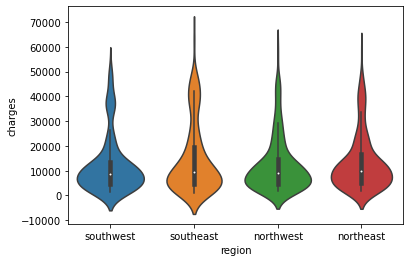

In [27]:
sns.violinplot(x="region", y='charges', data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

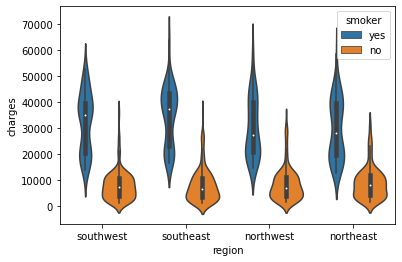

In [28]:
sns.violinplot(x="region", y='charges', hue="smoker", data=df)

In [29]:
data_grouped4=df.groupby('region').agg({'charges':'sum','sex':'count'})
data_grouped4['mean_charges3']=data_grouped4['charges']/data_grouped4['sex']
data_grouped4

,charges,sex,mean_charges3
region,,,
northeast,4.343669e+06,324,13406.384516
northwest,4.035712e+06,325,12417.575374
southeast,5.363690e+06,364,14735.411438
southwest,4.012755e+06,325,12346.937377


In [30]:
data_grouped5=df.groupby(['region','smoker']).agg({'sex':'count', 'charges':'sum'})
data_grouped5['mean_charges']=data_grouped5['charges']/data_grouped5['sex']
data_grouped5

sex       charges  mean_charges
region    smoker                                 
northeast no      257  2.355542e+06   9165.531672
          yes      67  1.988127e+06  29673.536473
northwest no      267  2.284576e+06   8556.463715
          yes      58  1.751136e+06  30192.003182
southeast no      273  2.192795e+06   8032.216309
          yes      91  3.170895e+06  34844.996824
southwest no      267  2.141149e+06   8019.284513
          yes      58  1.871606e+06  32269.063494

In [31]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df['sex'].drop_duplicates())
df['sex']=encoder.transform(df['sex'])
encoder.fit(df['smoker'].drop_duplicates())
df['smoker']=encoder.transform(df['smoker'])
data1=pd.get_dummies(df['region'], prefix='region')
data= pd.concat([df,data1], axis=1).drop(['region'],axis=1)
print(df.head(2))
print(df.dtypes)

   age  sex    bmi  children  smoker     region     charges
0   19    0  27.90         0       1  southwest  16884.9240
1   18    1  33.77         1       0  southeast   1725.5523
age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region       object
charges     float64
dtype: object


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y= data['charges']
X = data.drop(['charges'], axis=1)
lin_reg=LinearRegression()
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
lin_reg.fit(train_X,train_y)
pred_y=lin_reg.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE: %f" % (rmse))

RMSE: 6168.155294


RMSE: 5037.560717


C:\Users\vires\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

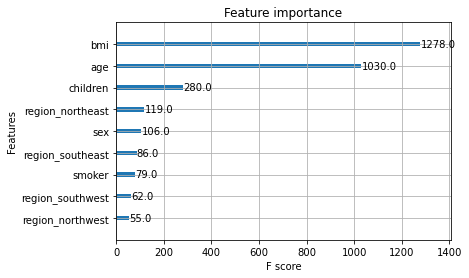

In [34]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import numpy as np

y= data['charges']
X = data.drop(['charges'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)
model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))
plot_importance(model_x)

In [35]:
y= data['charges']
X = data.drop(['charges','sex','region_northeast','region_northwest','region_southeast','region_southwest','children'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))

RMSE: 4906.889712


C:\Users\vires\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
